In [1]:
# nifty code using the pacman package
# it checks if the packages specified below are installed, if not, they will be installed, if yes, they will be loaded
if (!require("pacman")) install.packages("pacman")
pacman::p_load(rstudioapi, tidyverse, broom)

# set the current working directory to the one where this file is
# current_working_dir <- dirname(rstudioapi::getActiveDocumentContext()$path)
# setwd(current_working_dir)

Loading required package: pacman



## Introduction

We will be analyzing data from the following paper:

Winter, B. (2016). Taste and smell words form an affectively loaded part of the English
lexicon. Language, Cognition and Neuroscience, 31(8), 975–988.

These data pairs modality classification (e.g. smell, sight, touch) with context valence measures for a bunch of words. The valence measures come from a norming study in which 723 US American participants rated a set of 13,915 words on a scale from 1 (“unhappy, annoyed, unsatisfied, melancholic, despaired, bored”) to 9 (“happy, pleased, satisfied, contended, hopeful”). The most positive word in this data set is “vacation” (with a value of 8.53); the most negative is “pedophile” (with a value of 1.26).

In [2]:
# Load our datasets
senses <- read_csv("winter_2016_senses_valence.csv")

Rows: 405 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Word, Modality
dbl (1): Val


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
unique(senses$Modality)

[1] "Touch" "Sight" "Taste" "Smell" "Sound"

## Exercise 1 (Winter 7.12.1)

Using the senses tibble, create a boxplot that shows the valence for all the five senses. (`geom_boxplot`)
Next, plot a density graph with geom_density(). 
Map the Modality column onto the fill argument and increase the alpha to get transparent colors. 
What happens if you add the layer `+ facet_wrap(~Modality)` to the plot? (remember to put the plus behind the previous layer)

```{r exercise_1, warning = F, message = F}

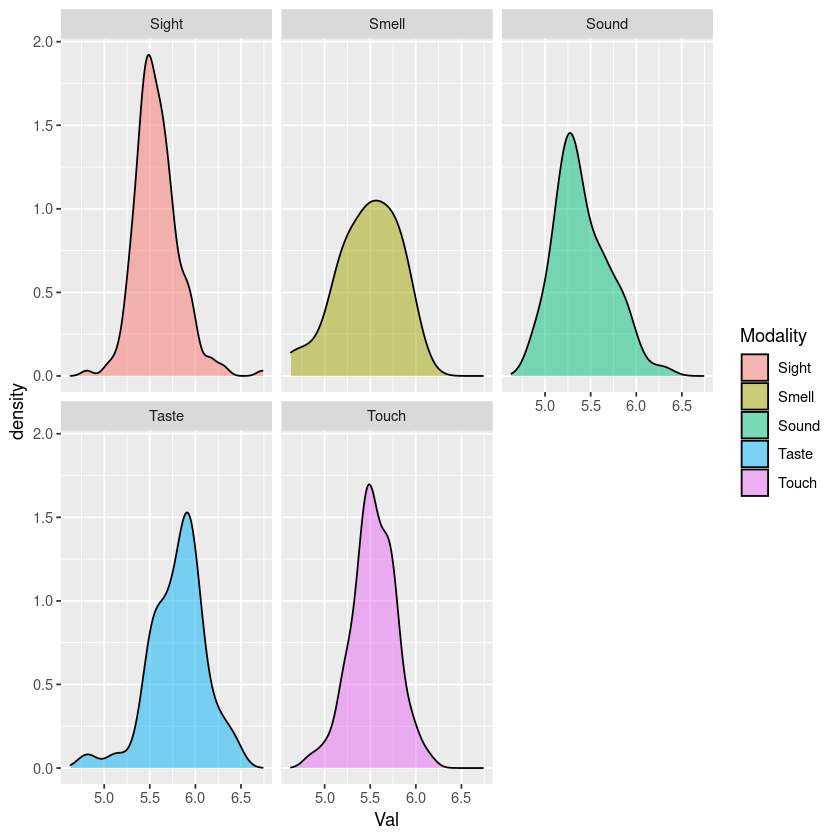

In [6]:
density_plot <- 
  senses %>% 
  ggplot(aes(x = Val, fill = Modality)) +
  geom_density(alpha = 0.5) 
  
# add facet layer
density_plot +
  facet_wrap(~Modality)

## Exercise 2

Let's look at a subset of the senses data for only the Sound and Taste modality.
We also run a simple linear model predicting `Val` from `Modality`.

```{r exercise_2_prep, warning = F, message = F}

In [7]:
# subset
senses_sub <- senses %>% 
  filter(Modality %in% c("Sound", "Taste"))
senses_sub

Word,Modality,Val
<chr>,<chr>,<dbl>
acidic,Taste,5.539592
alcoholic,Taste,5.557228
astringent,Taste,5.965000
audible,Sound,5.351284
banging,Sound,5.706667
barbecued,Taste,6.052778
barking,Sound,5.696316
beeping,Sound,4.898000
beery,Taste,6.072143


In [9]:
# run linear model
senses_mdl <- lm(Val ~ Modality, data = senses)
senses_mdl


Call:
lm(formula = Val ~ Modality, data = senses)

Coefficients:
  (Intercept)  ModalitySmell  ModalitySound  ModalityTaste  ModalityTouch  
      5.57966       -0.10865       -0.17447        0.22846       -0.04523  


### (a)
Interpret the output. 
What does the intercept represent?
How are the contrasts coded here? 
Treatment or sum coded? (check Figure 7.1 on page 135 again)

Modality,fit
<fct>,<dbl>
Sound,5.405193
Taste,5.808124


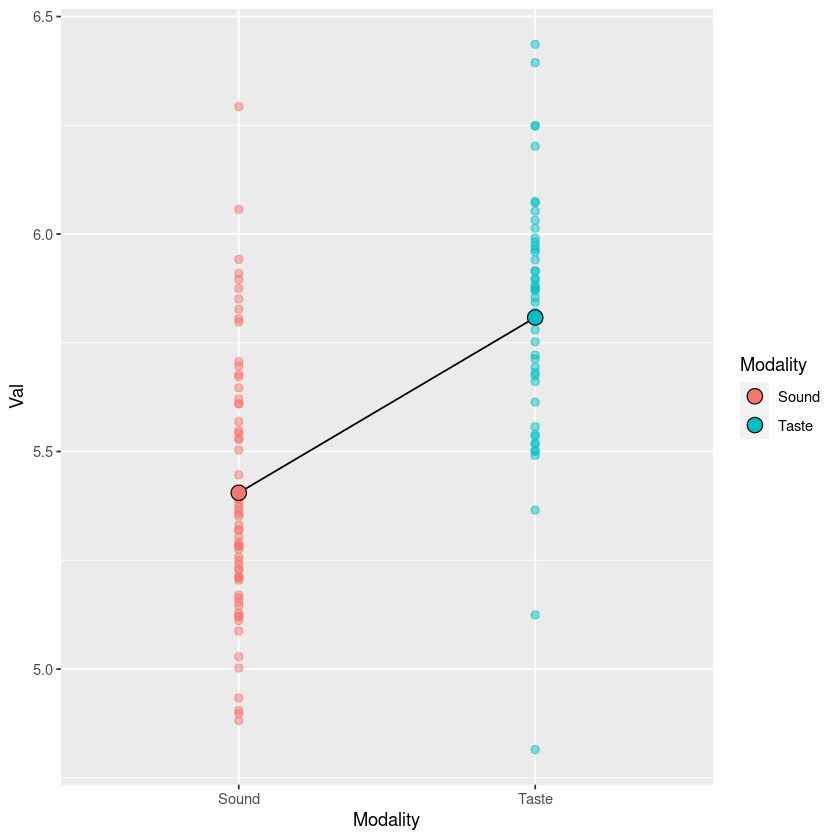

In [13]:
# Answer: The Intercept represents the Sound modality (first in alphabetical order)
# The other coefficient represents the difference between Taste and Sound.
# The contrasts are treatement coded here, i.e. one level serves as a reference level / the intercept

### (b)
# Take a sheet of paper and draw the model estimates into a plot.
# On the x-axis, you have the two modalities.
# On the y-axis, you have the `Val` variable.

# get predictions
senses_preds <- tibble(Modality =
                         sort(unique(senses_sub$Modality)))

# make a new column that contains the predicted values from senses_mdl applied to senses_preds
senses_preds$fit <- predict(senses_mdl, senses_preds)
senses_preds


senses_sub %>% 
  ggplot(aes(x = Modality,
             y = Val, 
             color = Modality)) +
  # add raw data
  geom_point(size = 2,
             alpha = 0.5) +
  # add model fit
  geom_line(data = senses_preds,
            aes(y = fit,
                group = 1),
            color = "black") +
  geom_point(data = senses_preds,
             aes(y = fit,
                 fill = Modality),
             size = 4,
             pch = 21,
             color = "black") 

### (c)
# Can you recode the contrasts into sum coding and run the model again? (check 7.7 again)

In [10]:
# double check that Modality is a factor
senses_sub <- mutate(senses_sub, Modality = factor(Modality))
class(senses_sub$Modality) == 'factor' # good

contrasts(senses_sub$Modality) <- contr.sum(2)

senses_mdl_sum <- lm(Val ~ Modality, data = senses_sub)
senses_mdl_sum

[1] TRUE


Call:
lm(formula = Val ~ Modality, data = senses_sub)

Coefficients:
(Intercept)    Modality1  
     5.6067      -0.2015  


In [11]:
senses_sub

Word,Modality,Val
<chr>,<fct>,<dbl>
acidic,Taste,5.539592
alcoholic,Taste,5.557228
astringent,Taste,5.965000
audible,Sound,5.351284
banging,Sound,5.706667
barbecued,Taste,6.052778
barking,Sound,5.696316
beeping,Sound,4.898000
beery,Taste,6.072143


## Exercise 3

Let's look at a subset of the senses data for all senses except the `Sound` modality.
We also run a simple linear model predicting `Val` from `Modality`.

```{r exercise_3_prep, warning = F, message = F}

In [12]:
# subset
senses_sub2 <- senses %>% 
  filter(Modality != "Sound")

# run linear model
senses_mdl2 <- lm(Val ~ Modality, data = senses_sub2)
senses_mdl2


Call:
lm(formula = Val ~ Modality, data = senses_sub2)

Coefficients:
  (Intercept)  ModalitySmell  ModalityTaste  ModalityTouch  
      5.57966       -0.10865        0.22846       -0.04523  


```

### (a)
Interpret the output. 
What does the intercept represent?

```{r exercise_3a_answer}

# Answer: The Intercept represents the Sight modality (first in alphabetical order)
# The other coefficient represents the difference between Sight and Smell, Taste, and Touch respectively.

```

### (b)
Take a sheet of paper and draw the model estimates into a plot.
On the x-axis, you have the two modalities.
On the y-axis, you have the `Val` variable.

```{r exercise_3b_answer}

In [17]:
# get predictions
senses_preds2 <- tibble(Modality =
                         sort(unique(senses_sub2$Modality)))
senses_preds2

Modality
<chr>
Sight
Smell
Taste
Touch


In [15]:
# make a new column that contains the predicted values from senses_mdl applied to senses_preds
senses_preds2$fit <- predict(senses_mdl2, senses_preds2)
senses_preds2

Modality,fit
<chr>,<dbl>
Sight,5.579663
Smell,5.471012
Taste,5.808124
Touch,5.534435


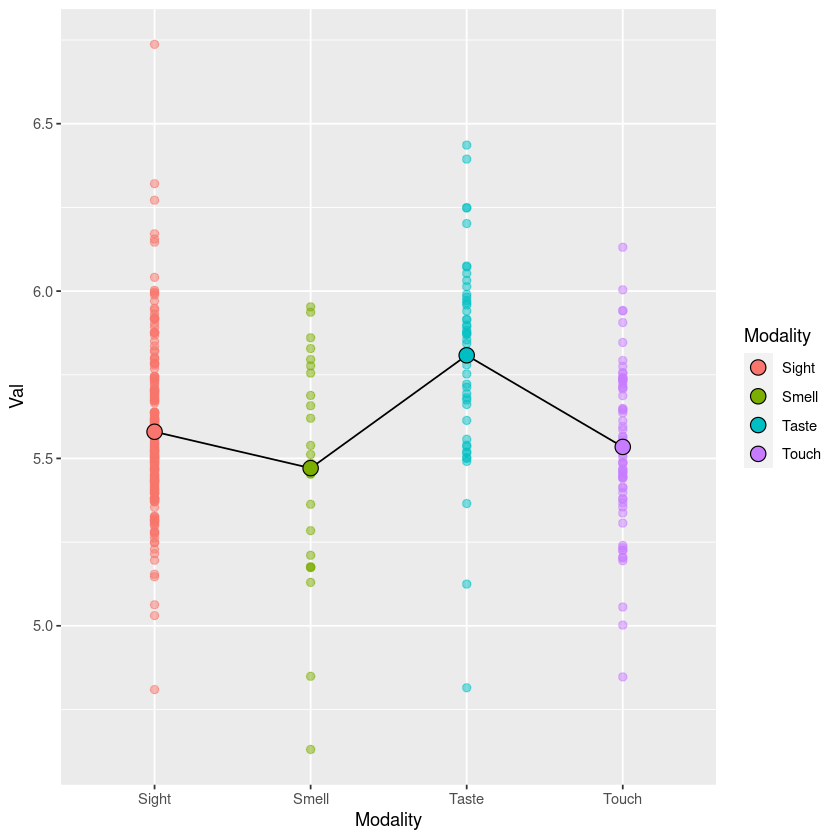

In [16]:
senses_sub2 %>% 
  ggplot(aes(x = Modality,
             y = Val, 
             color = Modality)) +
  # add raw data
  geom_point(size = 2,
             alpha = 0.5) +
  # add model fit
  geom_line(data = senses_preds2,
            aes(y = fit,
                group = 1),
            color = "black") +
  geom_point(data = senses_preds2,
             aes(y = fit,
                 fill = Modality),
             size = 4,
             pch = 21,
             color = "black") 

```

### (c)
Formulate the regression formula for (check E7.3 on page 144 again)
(i) the smell modality
(ii) for the touch modality

```{r exercise_3c_answer}

# model formula: y = intercept + coefficient * change in units
# (i)   smellValence = 5.58 + (-0.11) * (1) = 5.47
# (ii)  tocuhValence = 5.58 + (-0.05) * (1) = 5.53

```